In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
len(train_data)
len(test_data)
train_labels[10]

3

In [20]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [30]:
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 2.6881 - accuracy: 0.5093 - val_loss: 1.7827 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4251 - accuracy: 0.7107 - val_loss: 1.3013 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0324 - accuracy: 0.7808 - val_loss: 1.1301 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8139 - accuracy: 0.8324 - val_loss: 1.0181 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6501 - accuracy: 0.8648 - val_loss: 0.9726 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5170 - accuracy: 0.8954 - val_loss: 0.9299 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4196 - accuracy: 0.9173 - val_loss: 0.9049 - val_accuracy: 0.8070
Epoch 8/20
16

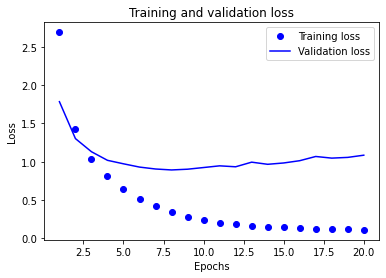

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

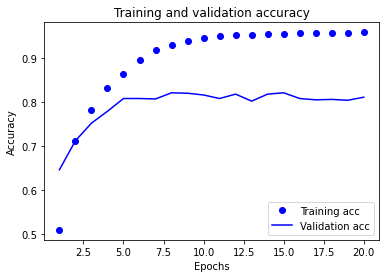

In [33]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 24ms/step - loss: 2.4901 - accuracy: 0.4851 - val_loss: 1.6801 - val_accuracy: 0.6290
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4037 - accuracy: 0.6959 - val_loss: 1.3197 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0610 - accuracy: 0.7669 - val_loss: 1.1421 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8342 - accuracy: 0.8205 - val_loss: 1.0273 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6623 - accuracy: 0.8594 - val_loss: 0.9696 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5281 - accuracy: 0.8882 - val_loss: 0.9254 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4191 - accuracy: 0.9095 - val_loss: 0.9410 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [35]:
results

[0.9569814801216125, 0.7925200462341309]

In [36]:
predictions = model.predict(x_test)